In [77]:
#BrushFrie
import collections
import numpy as np
from ipynb.fs.full.hw2_script import *

In [81]:
def BrushFire(grid):
    
    temp = np.copy(grid)
    q = collections.deque()
    m, n = len(temp), len(temp[0])
    
    ### [i,j,c] = [x, y, distance] 
    for i in range(m):
        for j in range(n):
            if temp[i][j] < 0:
                continue
            
            if i == 0 or j == 0 or i == m-1 or j == n-1:
                temp[i][j] = 1
                
    
    for i in range(m):
        for j in range(n):
            if temp[i][j] < 0:
                q.append([i,j,0])
            
            if temp[i][j] == 1:
                q.append([i,j,1])               
    
    ### BFS
    direciton = [[1,0],[0,1],[-1,0],[0,-1],[1,1],[-1,1],[-1,-1],[1,-1]]
    while q:
        x, y, dist = q.popleft()
        
        for dx, dy in direciton:
            i = x + dx
            j = y + dy
            if i < 0 or i >= m or j < 0 or j >= n:
                continue

            if temp[i][j] < 0:
                continue
                
            if temp[i][j] != 0 and temp[i][j] < dist + 1:
                continue
            
            if temp[i][j] == 0 or temp[i][j] > dist + 1:
                temp[i][j] = dist + 1
                q.append([i,j,dist + 1])
    
    return temp

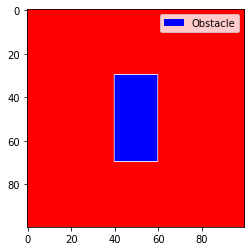

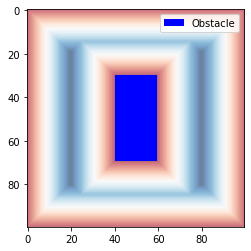

In [82]:
Map,x , y = generate_world_1()
plot_GVD(Map)
Map1BF = BrushFire(Map)
plot_GVD(Map1BF)

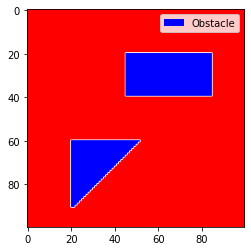

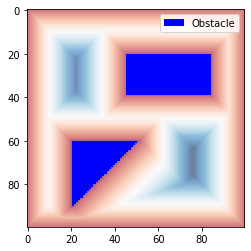

In [133]:
Map2,x , y = generate_world_2()
plot_GVD(Map2)
Map2BF = BrushFire(Map2)
plot_GVD(Map2BF)

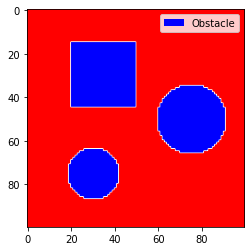

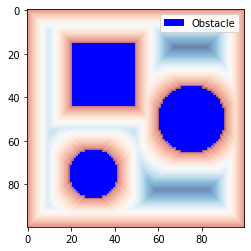

In [84]:
Map3, x , y = generate_world_3()
plot_GVD(Map3)
Map3BF = BrushFire(Map3)
plot_GVD(Map3BF)    
            

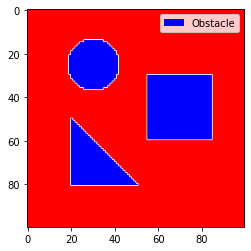

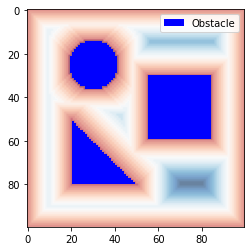

In [85]:
Map4, x , y = generate_world_4()
plot_GVD(Map4)
Map4BF = BrushFire(Map4)
plot_GVD(Map4BF)    
            

In [141]:
### GVD
        
def GVDMAP(grid):
    
    BF = BrushFire(grid)
    temp = np.copy(grid)
    q = collections.deque()
    m, n = len(temp), len(temp[0])
    
    ### [i,j,c] = [x, y, distance] 
    for i in range(m):
        for j in range(n):
            if temp[i][j] < 0:
                continue
            
            if i == 0 or j == 0 or i == m-1 or j == n-1:
                temp[i][j] = 1
                
    
    for i in range(m):
        for j in range(n):
            if temp[i][j] < 0:
                q.append([i,j,0, temp[i][j]])
                continue
            
            if temp[i][j] == 1:
                if i == 0 and j == 0:
                    q.append([i,j,1, -4])
                elif i == m-1 and j == n-1:
                    q.append([i,j,1, -5])
                elif i == 0:
                    q.append([i,j,1, -4])
                elif j == 0:
                    q.append([i,j,1, -7])
                elif j == n-1:
                    q.append([i,j,1, -5])
                elif i == m-1:
                    q.append([i,j,1, -6])
    
    ### BFS
    GVD_LIST = set()
    direciton = [[1,0],[0,1],[-1,0],[0,-1],[1,1],[-1,1],[-1,-1],[1,-1]]
    pointer = collections.defaultdict(set)
    
    while q:
        x, y, dist, ID = q.popleft()
        
        for dx, dy in direciton:
            i = x + dx
            j = y + dy
            if i < 0 or i >= m or j < 0 or j >= n:
                continue

            if temp[i][j] < 0:
                continue
                
#             if temp[i][j] != 0 and temp[i][j] < dist + 1:
#                 continue
            
            if temp[i][j] == 0 or temp[i][j] > dist + 1:
                if (i,j) in GVD_LIST:
                    GVD_LIST.remove((i,j))
                    
                temp[i][j] = dist + 1
                q.append([i,j,dist + 1, ID])
                pointer[(i,j)].add(ID)
            
            if temp[i][j] != 0 and (temp[i][j] == dist + 1 or abs(temp[i][j] - dist - 1) == 1) and len(pointer[(i,j)]) > 0 and ID not in pointer[(i,j)]:
                GVD_LIST.add((i,j))
                pointer[(i,j)].add(ID)
                                                                  
    
    return BF, GVD_LIST

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


def plotGVD(grid):
    MapBF, GVD_SET = GVDMAP(grid)
    plot_GVD(MapBF)
    GVD_LIST = np.array(list(GVD_SET))
    GVD_x, GVD_y = zip(*GVD_LIST)
    GVD_grid = np.copy(MapBF)
    GVD_grid[GVD_x,GVD_y] = 20
    fig, ax = plt.subplots()
    img1 = ax.imshow(GVD_grid, cmap="RdBu", alpha=0.6)
    obstacles = GVD_grid.copy()
    obstacles[obstacles < 0] = -2.0
    masked_data = np.ma.masked_where(obstacles > 0, obstacles)
    legend_elements = [Patch(facecolor='blue', label='Obstacle')]
    legend_elements.append(Patch(facecolor='#83b1d3', label='GVD'))
    img2 = ax.imshow(masked_data, cmap="bwr")
    ax.legend(handles=legend_elements)
    plt.show()
    return list(GVD_SET)

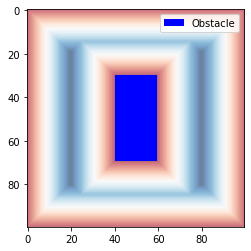

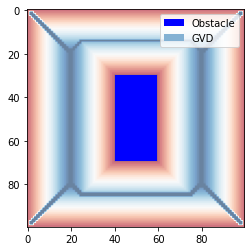

In [179]:
Map,x , y = generate_world_1()
PATH = plotGVD(Map)

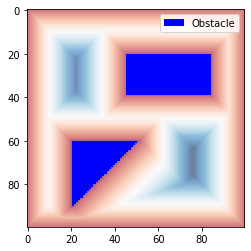

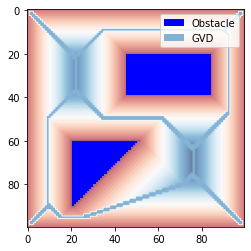

In [180]:
Map2,x , y = generate_world_2()
PATH = plotGVD(Map2)

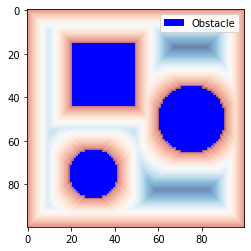

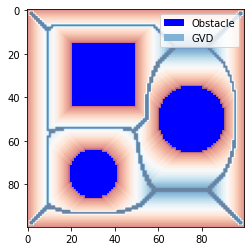

In [181]:
Map3, x , y = generate_world_3()
PATH = plotGVD(Map3)

In [220]:
def plotPATH(grid, start, end):
    MapBF, GVD_SET = GVDMAP(grid)
    plot_GVD(MapBF)
    GVD_LIST = np.array(list(GVD_SET))
    GVD_x, GVD_y = zip(*GVD_LIST)
    GVD_grid = np.copy(MapBF)
    GVD_grid[GVD_x,GVD_y] = 20
    
    A = tuple(start)
    B = tuple(end)
    
    AtoGVD = path_to_GVD(MapBF, list(GVD_SET), start)
    BtoGVD = path_to_GVD(MapBF, list(GVD_SET), end)
    s = AtoGVD[-1]
    BtoGVD.reverse()
    e = BtoGVD[0]
    Route = GVD_path(MapBF, list(GVD_SET), s, e)
    Route =  AtoGVD + Route + BtoGVD
    fig, ax = plt.subplots()
    img1 = ax.imshow(GVD_grid, cmap="RdBu", alpha=0.6)
    obstacles = GVD_grid.copy()
    obstacles[obstacles < 0] = -2.0
    masked_data = np.ma.masked_where(obstacles > 0, obstacles)
    legend_elements = [Patch(facecolor='blue', label='Obstacle')]
    legend_elements.append(Patch(facecolor='#83b1d3', label='GVD'))
    img2 = ax.imshow(masked_data, cmap="bwr")
    
    path_x, path_y = zip(*Route)
    GVD_grid[path_x,path_y] = 40.0
    grid_path = GVD_grid.copy()
    grid_path = np.ma.masked_where(grid_path != 40.0, grid_path)
    img3 = ax.imshow(grid_path, cmap="cool_r", interpolation="nearest") 
    legend_elements.append(Patch(facecolor='#e741f6', label='path'))
    ax.legend(handles=legend_elements)
    
    plt.show()
    

In [221]:
start = [20,3]
end = [95,75]

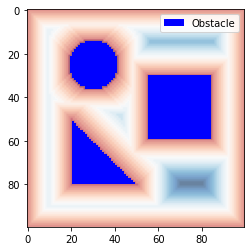

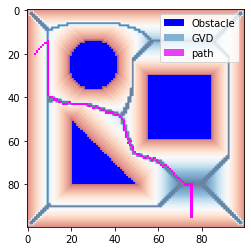

In [222]:
Map4, x , y = generate_world_4()
plotPATH(Map4, start, end)


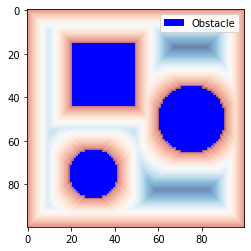

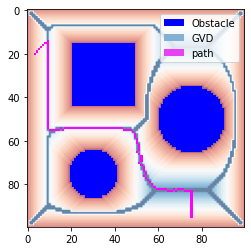

In [226]:
Map3, x , y = generate_world_3()
plotPATH(Map3, start, end)

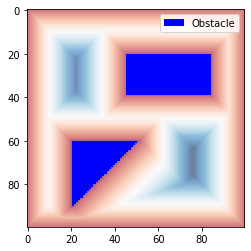

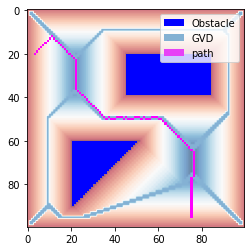

In [227]:
Map2, x , y = generate_world_2()
plotPATH(Map2, start, end)

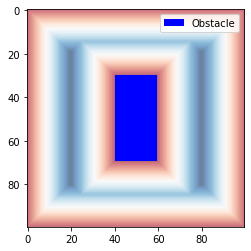

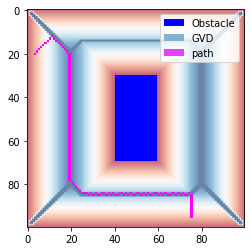

In [228]:
Map, x , y = generate_world_1()
plotPATH(Map, start, end)